In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize']=14,3
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("Airbnb_Data.csv")

In [3]:
new_data=data[[ 
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       ]]

In [4]:
#rename columns
new_data.columns=[ 
       'Neighbourhood_Group', 'Neighbourhood', 'Lat', 'Long', 'Country',
       'Country_Code', 'Room_Type',
       'Construction_Year', 'Price', 'Service_Fee', 'Minimum_Nights',
       'Number_Of_Reviews', 'Last_Review', 'Reviews_Per_Month',
       'Review_Rate_Number', 'Calculated_Host_Listings_Count',
       ]



In [5]:
new_data=new_data.dropna()

In [6]:
new_data["Neighbourhood_Group"].replace('brookln','Brooklyn', inplace=True)

In [7]:
new_data["Price"]=new_data["Price"].str.replace("$", '').str.replace(" ", '').str.replace(",", '').astype(float).astype(int)

In [8]:
new_data["Service_Fee"]=new_data["Service_Fee"].str.replace("$", '').str.replace(" ", '').str.replace(",", '').astype(float).astype(int)

In [9]:
new_data=new_data[new_data.Room_Type!='Hotel room']

<h1><center><b>Rent Price in Neighborhood of New York </b></center></h1>

In [10]:
import warnings 
warnings.filterwarnings('ignore')

In [11]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display, clear_output
#import panel as pn

In [28]:
def pie_chart (Neighbourhood): 
   
    new_data[new_data.Neighbourhood_Group==Neighbourhood].groupby(['Room_Type']).aggregate(sum=('Room_Type', 'count')).plot(kind='pie', y='sum', autopct='%1.0f%%', ylabel='')
    # draw circle
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
 
    # Adding Circle in Pie chart
    fig.gca().add_artist(centre_circle)
 
    # Adding Title of chart
    plt.title(f"Precent of Room's Type for Rent in {Neighbourhood}", fontsize=20, color="darkblue")
    plt.legend( bbox_to_anchor=(2,1),  loc='upper right')

    # Displaying Chart
    plt.show()  
    

In [29]:
w3=interact(pie_chart,
       Neighbourhood = widgets.Dropdown(
    
    options=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
           button_type='success'))

interactive(children=(Dropdown(description='Neighbourhood', options=('Bronx', 'Brooklyn', 'Manhattan', 'Queens…

In [41]:

def plot_histogram1 (Neighbourhood,type_room): 
 
    fig= plt.figure()
   
    #plt.figure(dpi = 120)
    plt.hist([new_data[(new_data.Neighbourhood_Group==Neighbourhood) & (new_data.Room_Type==type_room)].Price], 
             
          bins=30, color=col(type_room), edgecolor = "black")
    
    
  
    plt.title(f"Rent Price of {type_room} in {Neighbourhood}", fontsize=20, color="darkblue")    
    plt.xlabel('Price, $', fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.close()
    return fig

In [42]:

def col (type_room):
    if (type_room == "Private room"):
        return "red"
    elif (type_room == "Shared room"):
        return "brown"

    else:
        return "green"

In [43]:
w2=interact(plot_histogram1, 
       Neighbourhood = widgets.Dropdown(
    
    options=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
           button_type='success'), 
            
               type_room= widgets.Dropdown( options=["Private room","Shared room", "Entire home/apt"],
   
            
           button_type='success' )) 

interactive(children=(Dropdown(description='Neighbourhood', options=('Bronx', 'Brooklyn', 'Manhattan', 'Queens…

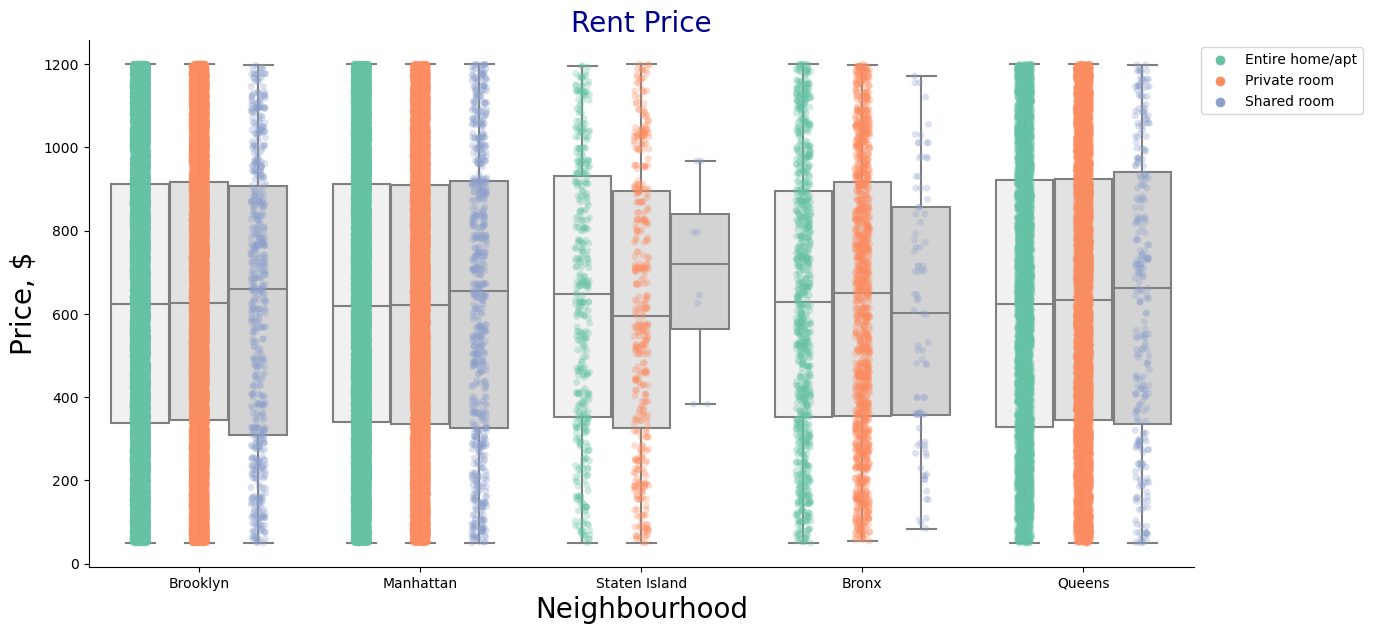

In [45]:


b=sns.catplot( data=new_data, x='Neighbourhood_Group', y='Price' , 
                 hue='Room_Type', kind="box",  height=6,
            aspect=2, legend = False,
               hue_order=['Entire home/apt',  'Private room', 'Shared room'], color="lightgrey",
                  showfliers = False)    



b=sns.stripplot( data=new_data, x='Neighbourhood_Group', y='Price' , 
                 hue='Room_Type',jitter=True,dodge=True, marker='o',
             palette="Set2" ,    alpha = 0.3, 
               hue_order=['Entire home/apt',  'Private room', 'Shared room'])  
      
              
# how to remove redundant legends in Python
# Let us first get legend information from the plot object
handles, labels =b.get_legend_handles_labels()
# specify just one legend
plt.legend( handles[3:6],labels[3:6], bbox_to_anchor=(1, 1.0), loc='upper left')
#plt.legend(bbox_to_anchor=(1, 1.0), loc='upper left')
plt.title('Rent Price',  fontsize=20, color="darkblue")    
plt.xlabel('Neighbourhood', fontsize=20)
plt.ylabel('Price, $', fontsize=20)

plt.show()
